In [2]:
# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
# ------- SERVER EXTENSIONS ---------
import os
from os.path import join
import sklearn
from utilities.droplet_dataset import *
# from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
import time
import matplotlib.pyplot as plt
import copy
from scipy import stats
from sklearn.cluster import KMeans
from collections import Counter
from PIL import Image, ImageColor
# from termcolor import colored
from sklearn.manifold import TSNE
from droplet_dataset import loading_sample
from DL.Mars_seq_DL.data_loading import extract_droplet_data_from_pickle
from cnmf import *

ModuleNotFoundError: No module named 'fastcluster'

In [6]:
import numpy as np
import pandas as pd
import os, errno
import datetime
import uuid
import itertools
import yaml
import subprocess
import scipy.sparse as sp


from scipy.spatial.distance import squareform
from sklearn.decomposition import non_negative_factorization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import sparsefuncs


from fastcluster import linkage
from scipy.cluster.hierarchy import leaves_list

import matplotlib.pyplot as plt

import scanpy as sc


ModuleNotFoundError: No module named 'fastcluster'

## Convert sample count (non-normalized) file

In [6]:
# inf
sample_id = 'M97'

In [7]:
inf_sample_path = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\4.3.21\{sample_id}.pkl'
inf_sample = pickle.load(open(inf_sample_path, 'rb'))
sample_path = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\ROW_DATA\{sample_id}.pkl'
sample = pickle.load(open(sample_path, 'rb'))

In [49]:
out_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\count_M97.txt'
# is_cancer_barcode_mapping = dict(zip(inf_sample[1], inf_sample[0].getattr('is_cancer')))
is_cancer = inf_sample[0].getattr('is_cancer') # for getting only tumor cells
# is_cancer = [not aa for aa in inf_sample[0].getattr('is_cancer')] # for getting only immune cells


counts = sample[0][is_cancer, :]
cell_ids = [sample[1][i] for i in range(len(sample[1])) if is_cancer[i]]
gene_ids = sample[2]
gene_names = sample[3]

# drop all gene with count=0
gene_indices = (np.sum(counts, axis=0)!=0)
gene_names = [gene_names[i] for i in range(len(gene_names)) if gene_indices[i]]
gene_ids = [gene_ids[i] for i in range(len(gene_names)) if gene_indices[i]]
values = counts[:, gene_indices]
print(values.shape)

with open(out_path, 'w') as writer:

    gene_file = ''
    for gene in gene_names:
        gene_file += '\t'+gene
    gene_file += '\n'
    writer.write(gene_file)

    cell_file = ''
    for c_idx in range(len(cell_ids)):
        cell_file += cell_ids[c_idx]+'\t'+'\t'.join(values[c_idx].astype(str).tolist())+'\n'
    writer.write(cell_file)

(1971, 19397)


## Test count file

In [9]:
with open(out_path, 'r') as f:
    lines = f.readlines()
    
line = lines[1]
processed_line = str(line).split('\t')
values = processed_line[1:]

values[-1] = values[-1].replace('\n', '')
values = [int(v) for v in values]
cell_id = processed_line[0]

print(f'Number of genes {len(values)}')
print(f'Number of cells {len(lines)-1}')
values[-1:]

Number of genes 19559
Number of cells 2325


[0]

## cNMF run parameters

In [50]:
countfn = r'"D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\count_M97.txt"'
run_file_path = r'"D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py"'

## Results will be saved to [output_directory]/[run_name] which in this example is simulated_example_data/example_cNMF
output_directory = r'"D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97"'
run_name = '"cNMF_M97_run"'

numiter=20 ## Set this to a larger value for real data. We set this to a low value here for illustration
numworkers=1 ## Set this to a larger value and use the parallel code cells to try out parallelization
numhvgenes=1500 ## Number of over-dispersed genes to use for running the factorizations
K = ' '.join([str(i) for i in range(5,20)])

seed = 14
print(K)

5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


## Prepare the normalized count matrix of highvar genes and the cNMF parameters file assuming no parallelization
 - This will normalize the counts matrix and select the 2000 most over-dispersed genes for running cNMF on.
 - It indicates that it will run 5 NMF iterations each for K=4, 5, 6, 7, and 8. With one worker

In [51]:
prepare_cmd = f'python {run_file_path} prepare --output-dir %s --name %s -c %s -k %s --n-iter %d --total-workers %d --seed %d --numgenes %d' % (output_directory, run_name, countfn, K, numiter, numworkers, seed, numhvgenes)
print('Prepare command:\n%s' % prepare_cmd)
! {prepare_cmd}

Prepare command:
python "D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py" prepare --output-dir "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97" --name "cNMF_M97_run" -c "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\count_M97.txt" -k 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --n-iter 20 --total-workers 1 --seed 14 --numgenes 1500


C:\Users\itay\AppData\Roaming\Python\Python37\site-packages\scanpy\preprocessing\_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Run the factorization step of cNMF without any parallelization

This might take a few minutes to a half hour depending on how many cores there are on your machine.  You can lower the number of iterations or the K values being considered to speed this up.

As some more explanation, all of the factorization tasks were allocated in the prepare step above to a single worker (worker # 0). We are now executing the factorization steps for that single worker.

In our testing, this took less than a minute to run

In [52]:
factorize_cmd = f'python {run_file_path} factorize --output-dir %s --name %s --worker-index 0' % (output_directory, run_name)
print('Factorize command for worker 0:\n%s' % factorize_cmd)
! {factorize_cmd}

Factorize command for worker 0:
python "D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py" factorize --output-dir "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97" --name "cNMF_M97_run" --worker-index 0
[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24

## Combine the replicate spectra into merged spectra files

Now that the individual factorization replicates have been run, we need to combine them into a single file for each value of K tested

In [53]:
cmd = f'python {run_file_path} combine --output-dir %s --name %s' % (output_directory, run_name)
print('Combine command:\n%s' % cmd)
!{cmd}

Combine command:
python "D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py" combine --output-dir "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97" --name "cNMF_M97_run"
Combining factorizations for k=5.
Combining factorizations for k=6.
Combining factorizations for k=7.
Combining factorizations for k=8.
Combining factorizations for k=9.
Combining factorizations for k=10.
Combining factorizations for k=11.
Combining factorizations for k=12.
Combining factorizations for k=13.
Combining factorizations for k=14.
Combining factorizations for k=15.
Combining factorizations for k=16.
Combining factorizations for k=17.
Combining factorizations for k=18.
Combining factorizations for k=19.


## Plot the trade-off between error and stability as a function of K to guide selection of K 

There is no perfect way to choose the value of K for cNMF or for any matrix factorization or clustering algorithm. One approach that can be helpful is to plot the trade-off between solution stability and solution error. We can plot that with the command below

In [54]:
plot_K_selection_cmd = 'python %s k_selection_plot --output-dir %s --name %s' % (run_file_path, output_directory, run_name)
print('Plot K tradeoff command:\n%s' % plot_K_selection_cmd)
!{plot_K_selection_cmd}

Plot K tradeoff command:
python "D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py" k_selection_plot --output-dir "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97" --name "cNMF_M97_run"


### The plot was just saved to ./simulated_example_data/example_cNMF/example_cNMF.k_selection.pdf

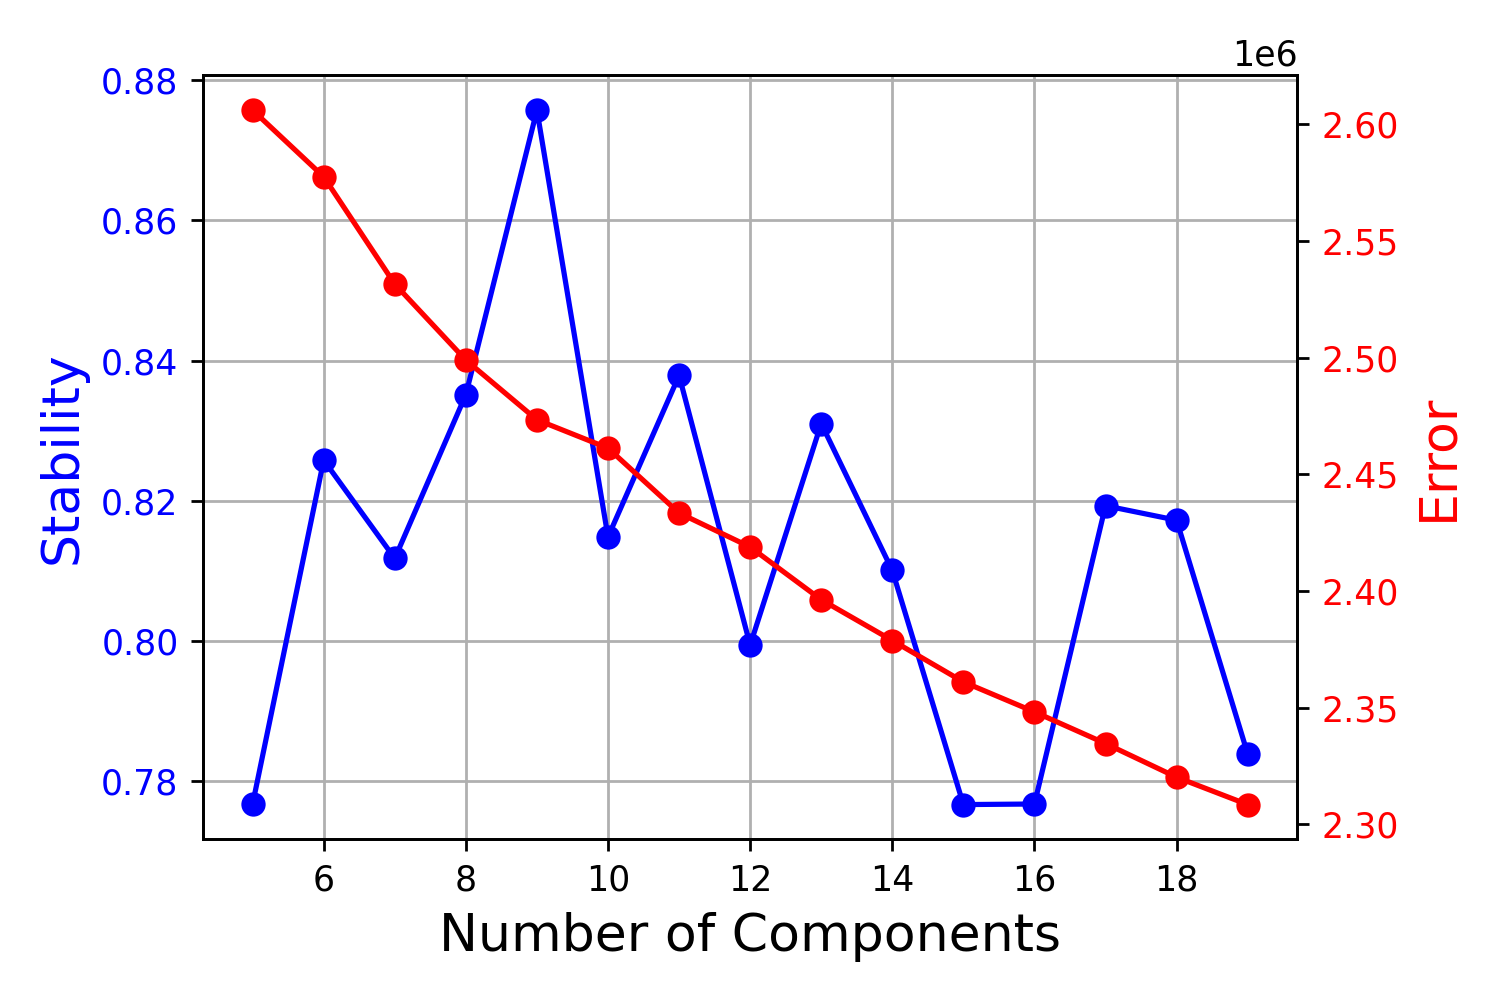

In [55]:
from IPython.display import Image

# Image(filename = 'D:/Technion studies/Keren Laboratory/python_playground/outputs/temporal garbage/cNMF_M97/cNMF_M97_run/cNMF_M97_run.k_selection.png', width=1000, height=1000)
Image(filename = 'D:/Technion studies/Keren Laboratory/python_playground/outputs/temporal garbage/cNMF_M97/cNMF_M97_run/cNMF_M97_run.k_selection.png', width=1000, height=1000)

## We proceed to obtain the consensus matrix factorization estimates

We first look at how the results look without filtering and then set a threshold for filtering outliers based on the consensus clustergram

In [56]:
selected_K = 9

In [57]:
## This is the command you would run from the command line to obtain the consensus estimate with no filtering
## and to save a diagnostic plot as a PDF
consensus_cmd = 'python %s consensus --output-dir %s --name %s --local-density-threshold %.2f --components %d --show-clustering' % (run_file_path, output_directory, run_name, 2.00, selected_K)
print('Consensus command for K=%d:\n%s' % (selected_K, consensus_cmd))
!{consensus_cmd}

Consensus command for K=9:
python "D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py" consensus --output-dir "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97" --name "cNMF_M97_run" --local-density-threshold 2.00 --components 9 --show-clustering


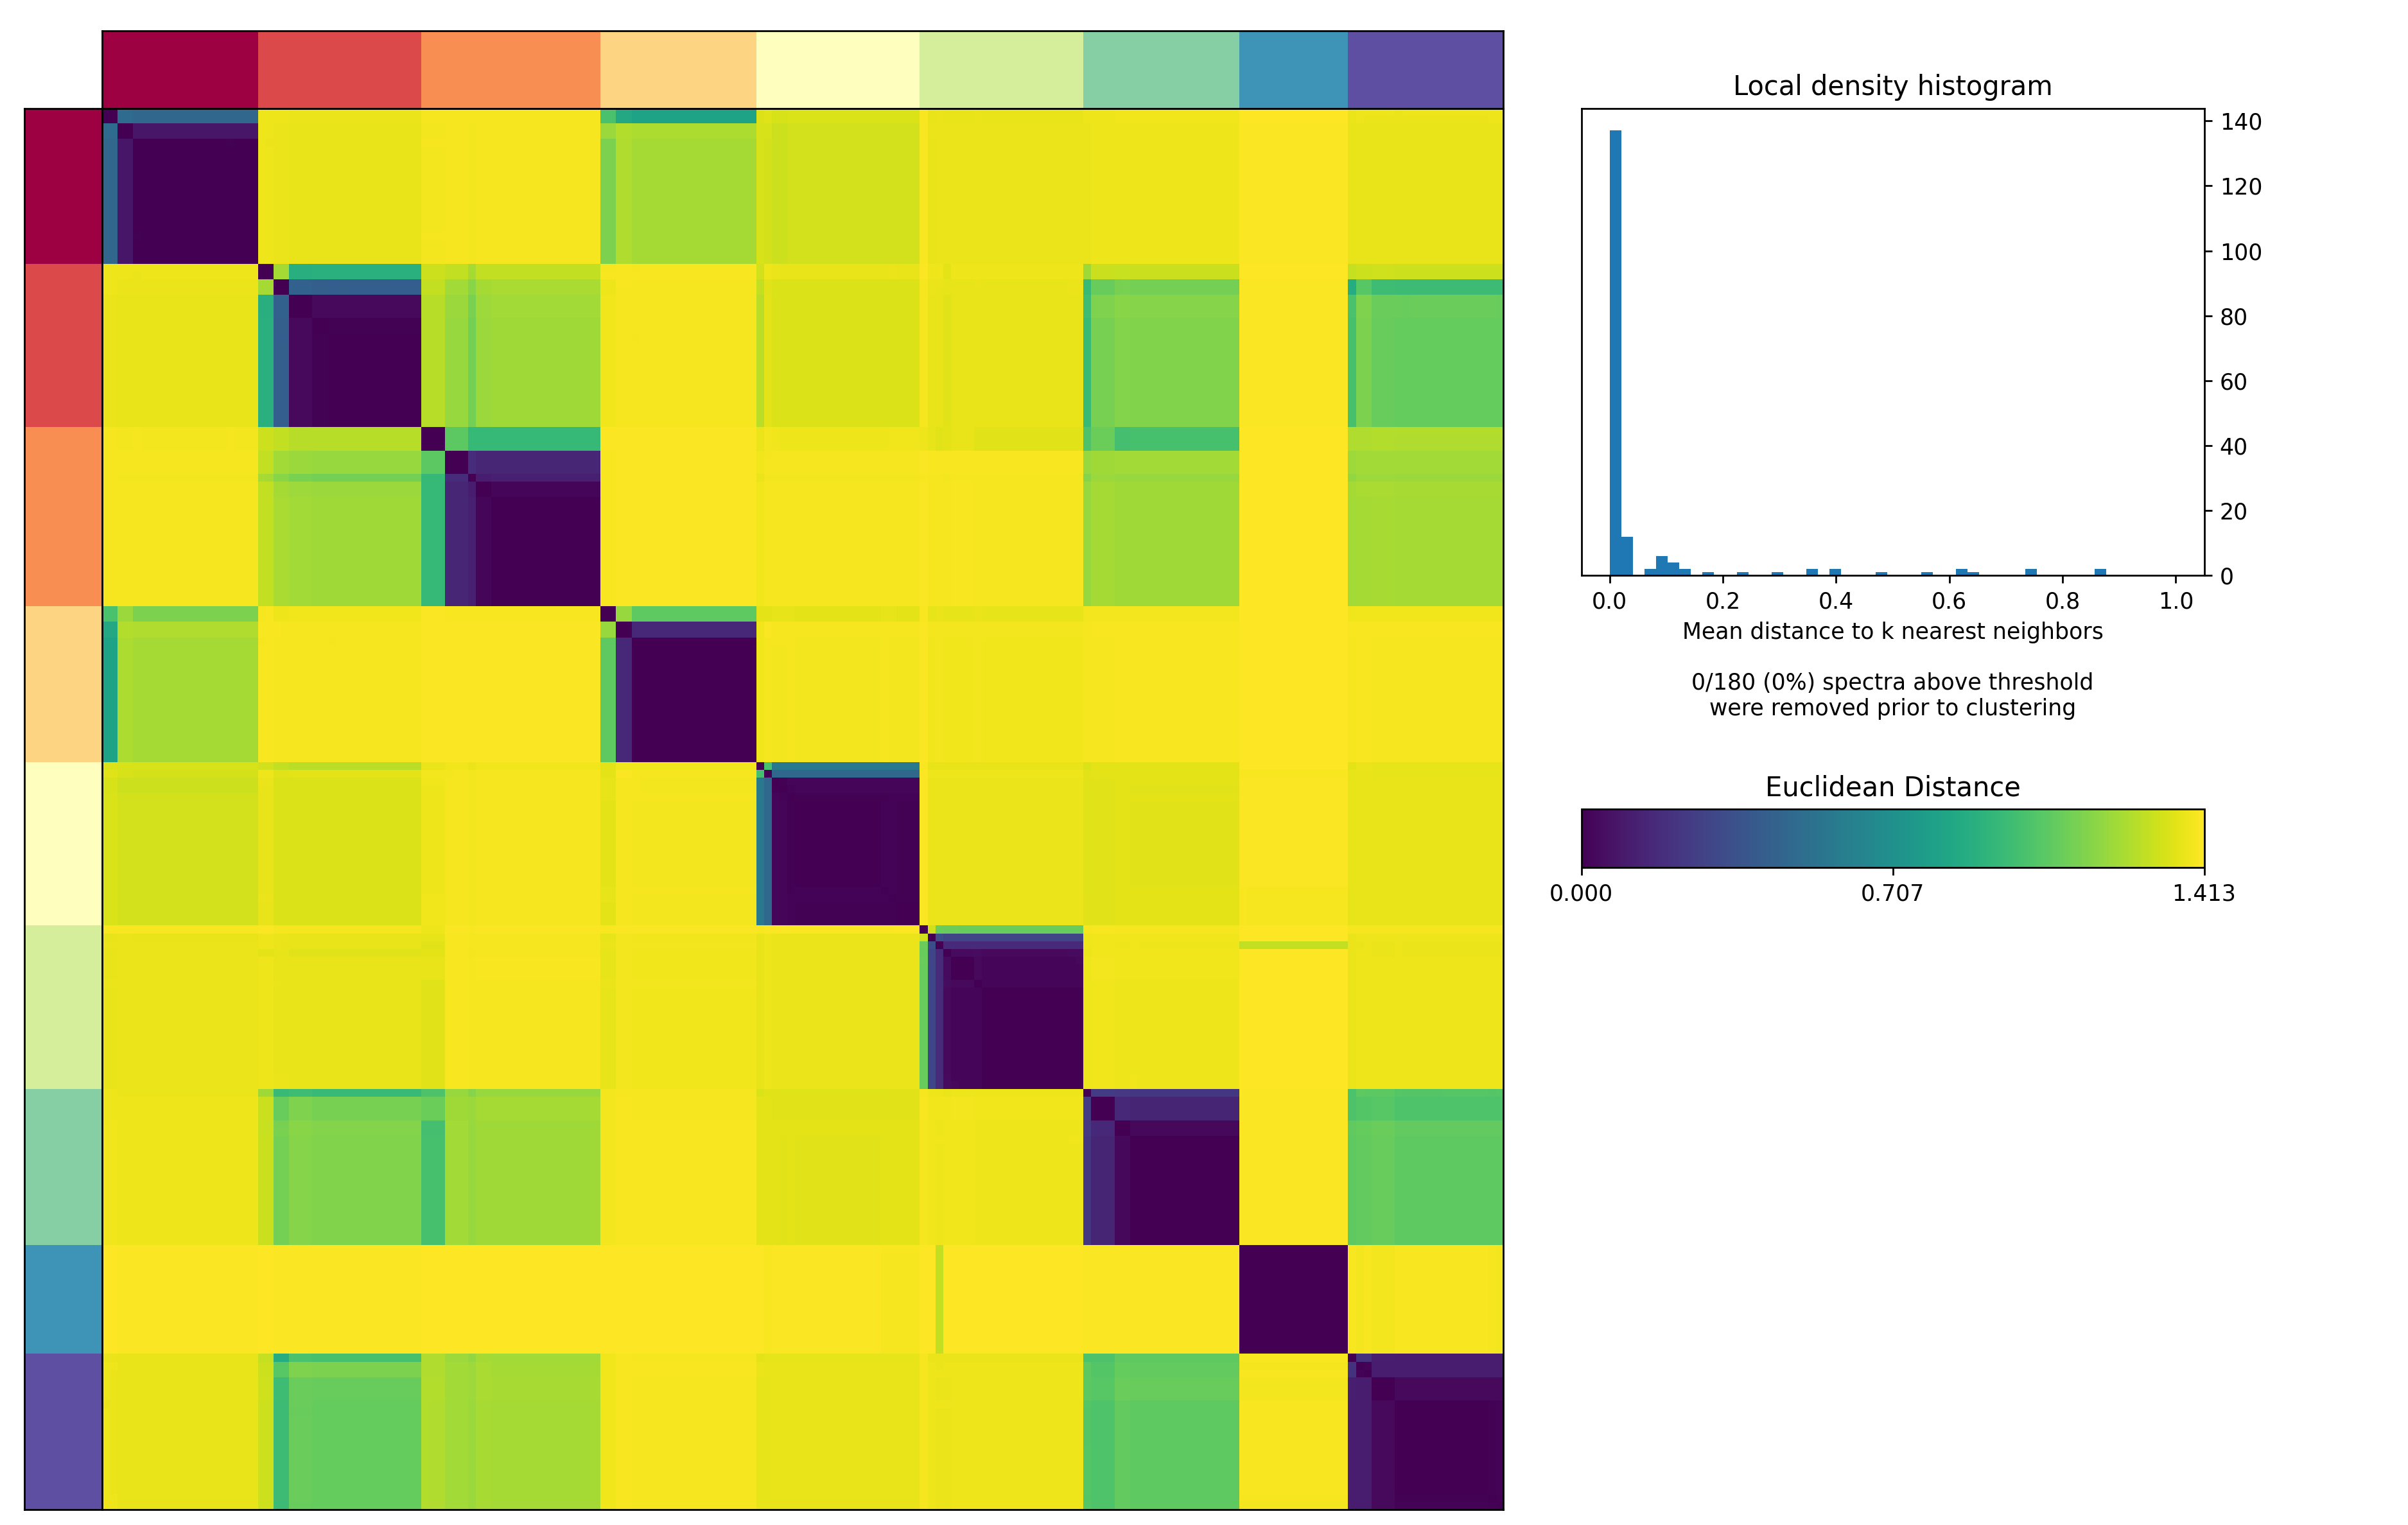

In [58]:
from IPython.display import Image
Image(filename = fr"{output_directory[1:-1]}\{run_name[1:-1]}\{run_name[1:-1]}.clustering.k_%d.dt_2_00.png" % selected_K, width=1000, height=1000)


This looks reasonable. We are finding 7 clusters as expected. In this case, there aren't any noisey outlier components to filter before clustering. However, in general there will be and we would filter them out by setting a threshold on the local density histogram. For example, you could set a threshold of 0.1 like below


In [59]:
density_threshold = 0.10
density_threshold_str = '0_10'

In [60]:
consensus_cmd = 'python %s consensus --output-dir %s --name %s --local-density-threshold %.2f --components %d --show-clustering' % (run_file_path, output_directory, run_name,density_threshold, selected_K)
print('Command: %s' % consensus_cmd)
!{consensus_cmd}

Command: python "D:\Technion studies\Keren Laboratory\python_playground\cNMF\cnmf.py" consensus --output-dir "D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\cNMF_M97" --name "cNMF_M97_run" --local-density-threshold 0.10 --components 9 --show-clustering


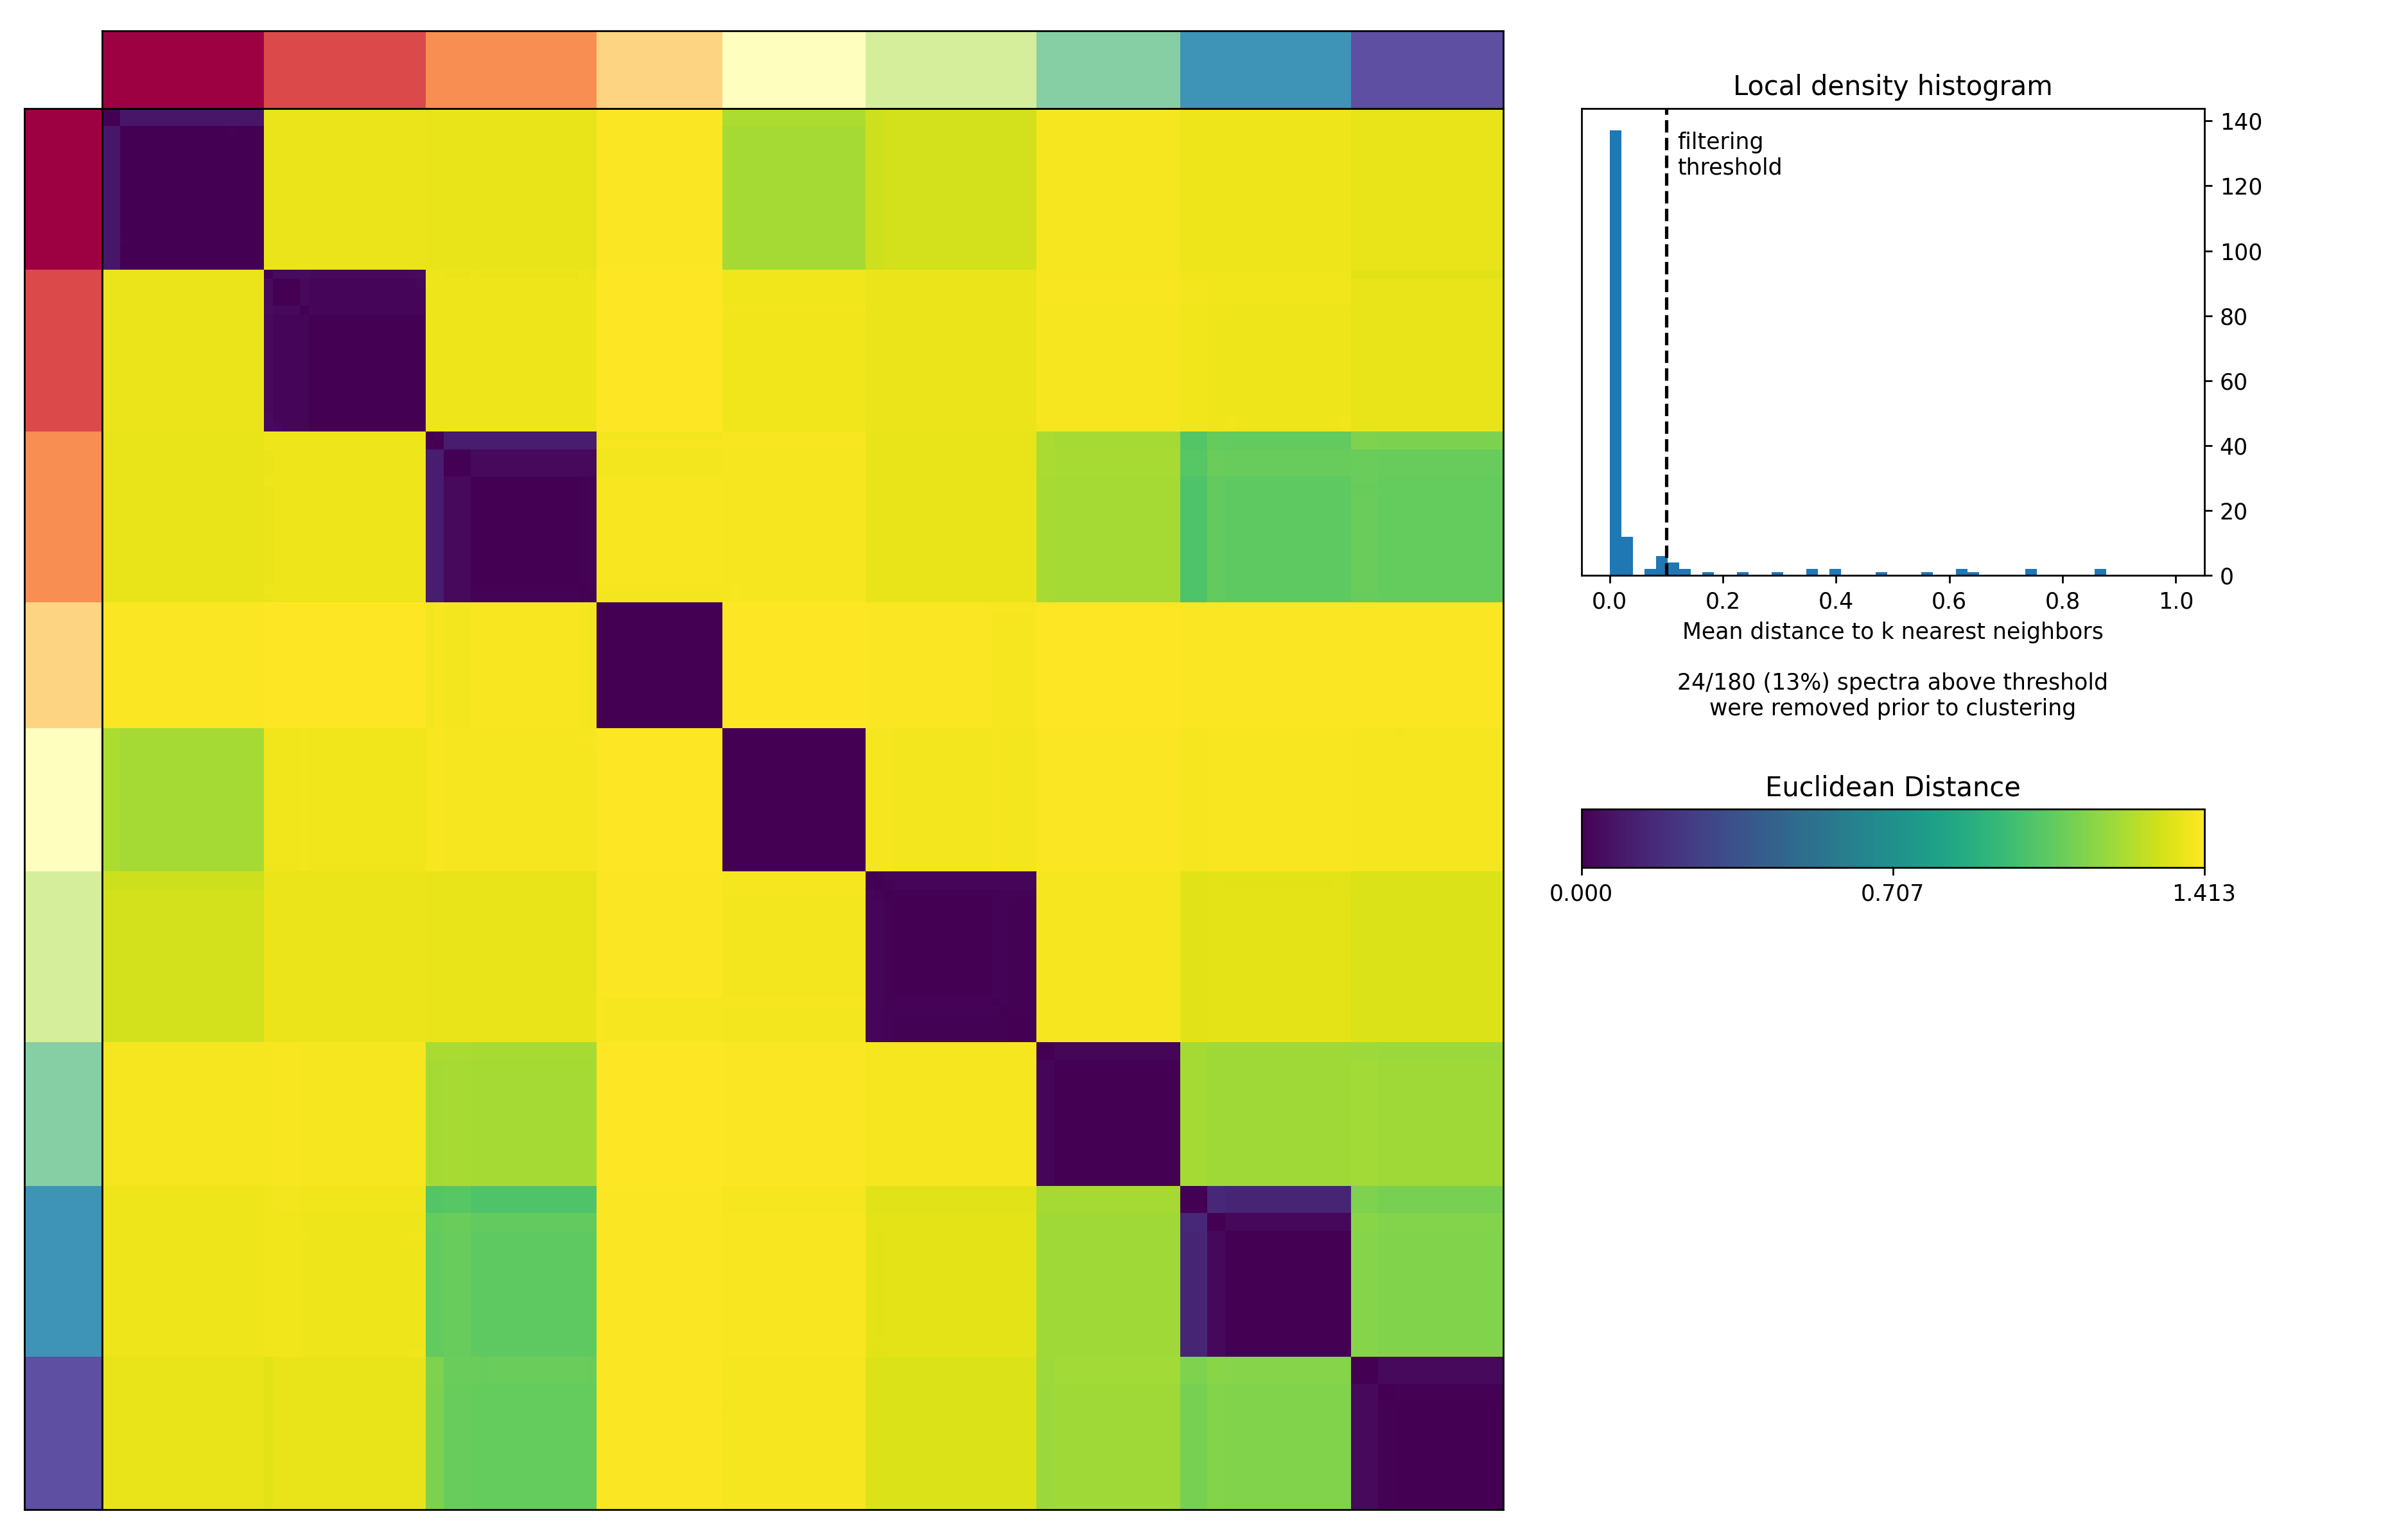

In [61]:
from IPython.display import Image
Image(filename = fr"{output_directory[1:-1]}\{run_name[1:-1]}\{run_name[1:-1]}.clustering.k_%d.dt_%s.png" % (selected_K, density_threshold_str), width=1000, height=1000)

### Our intended final results files are:

 - example_cNMF.gene_spectra_score.k_6.dt_0_40.txt
 - example_cNMF.gene_spectra_tpm.k_6.dt_0_40.txt
 - example_cNMF.usages.k_6.dt_0_40.consensus.txt
 
The first 2 contain the GEPs re-fit to all of the genes either in units of tpm (example_cNMF.gene_spectra_tpm.k_6.dt_0_40.txt) or in Z-score units (example_cNMF.gene_spectra_score.k_6.dt_0_40.txt). The usage matrix is (example_cNMF.usages.k_6.dt_0_40.consensus.txt)

## Now lets make a few plots to illustrate the results

### Doing the following block step by step

Wan written by me (19.4.21), since there was no TSNE embedded file to upload and I needed to build it myself

In [62]:
# only statistics to check if the file we will upload is the right one.
pp = fr'{output_directory[1:-1]}\{run_name[1:-1]}\cnmf_tmp'
pp = os.path.join(pp, fr'{run_name[1:-1]}.tpm_stats.df.npz')

stats_tpm = load_df_from_npz(pp)
stats_tpm.head(2)

,__mean,__std
0,0.199560,5.457848
1,0.037339,1.657261


In [63]:
import scanpy as sc
pp = fr'{output_directory[1:-1]}\{run_name[1:-1]}\cnmf_tmp'
# pp = os.path.join(pp, fr'{run_name[1:-1]}.tpm.h5ad') # TPM counts of all genes
pp = os.path.join(pp, fr'{run_name[1:-1]}.norm_counts.h5ad') # TPM normalized counts of high-variance genes

obj = sc.read(pp)
tpm_matrix = obj.to_df() # .values
# tpm_matrix.shape

In [64]:
# PCs = PCA(n_components=10).fit_transform(preprocessing.scale(TPM_hvgs)) 
# PCs = pd.DataFrame(PCs, index=TPM_hvgs.index, columns=['PC%d' % i for i in range(1,11)]) PCs.head()
from sklearn import preprocessing
from sklearn.decomposition import PCA

PCs = PCA(n_components=10).fit_transform(preprocessing.scale(tpm_matrix))
PCs = pd.DataFrame(PCs, index=tpm_matrix.index, columns=['PC%d' % i for i in range(1,11)]) 
PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
AAACCTGAGTGGAGTC-1,0.180549,-0.428202,-0.008320,-1.252616,-0.622300,0.256942,-0.172745,-1.680438,0.274963,-0.168967
AAACCTGCATCACAAC-1,2.334693,-0.817393,-1.085720,-3.865654,-0.556286,-2.666951,-0.239825,3.923569,-2.787071,-0.073680
AAACCTGGTCATTAGC-1,8.135023,-1.244376,-0.070801,-4.133187,-0.972220,-4.903157,-0.067159,7.185646,-1.784565,0.452560
AAACCTGGTCTGCGGT-1,8.205419,-0.936027,-1.918295,-6.490156,-0.278226,-2.323637,0.303476,3.056676,-0.106996,0.173634
AAACCTGTCTCAACTT-1,-2.406226,-0.425592,0.437311,-0.762896,-0.343621,-1.665228,-0.220232,1.603140,0.142550,-0.035936


In [65]:
# TSNE
from bhtsne import tsne
tsne_results = pd.DataFrame(tsne(PCs.values), index=PCs.index, columns=['TSNE1', 'TSNE2']) 
tsne_results.to_csv(fr'{output_directory[1:-1]}\tsne.txt', sep='\t')


### Run PCA on high-var genes TPM normalized

This step can be skipped if you want to just load the pre-generated tsne results in ./simulated_example_data/tsne.txt

from bhtsne import tsne
spectra_hvgs = pd.read_csv('./simulated_example_data/example_cNMF/example_cNMF.spectra.k_%d.dt_%s.consensus.txt' % (selected_K, density_threshold_fn), sep='\t', index_col=0)
spectra_hvgs.head()

TPM = load_df_from_npz('./simulated_example_data/example_cNMF/cnmf_tmp/example_cNMF.tpm.df.npz') ## This is the TPM (transcripts per million normalized) file that was saved as an intermediate
TPM.head()

TPM_hvgs = TPM.loc[:, spectra_hvgs.columns] ## Subset only our list of highvar genes

## And run PCA
PCs = PCA(n_components=10).fit_transform(preprocessing.scale(TPM_hvgs))
PCs = pd.DataFrame(PCs, index=TPM_hvgs.index, columns=['PC%d' % i for i in range(1,11)])
PCs.head()

## And run tSNE
tsne_results = pd.DataFrame(tsne(PCs.values), index=PCs.index, columns=['TSNE1', 'TSNE2'])
tsne_results.to_csv('./simulated_example_data/tsne.txt', sep='\t')

### Plot the ground truth as well as the cNMF inferences on a tSNE plot

In [66]:
usage_matrix = pd.read_csv(fr'{output_directory[1:-1]}\{run_name[1:-1]}\{run_name[1:-1]}.usages.k_%d.dt_%s.consensus.txt' % (selected_K, density_threshold_str), sep='\t', index_col=0)
usage_matrix.columns = np.arange(1,selected_K+1)
normalized_usage_matrix = usage_matrix.div(usage_matrix.sum(axis=1), axis=0)
normalized_usage_matrix.head()

,1,2,3,4,5,6,7,8,9
AAACCTGAGTGGAGTC-1,0.011513,0.000000,0.495639,0.000000,0.000000,0.000000,0.005823,0.266185,0.220840
AAACCTGCATCACAAC-1,0.000000,0.007942,0.868627,0.000000,0.000000,0.000979,0.000000,0.039910,0.082543
AAACCTGGTCATTAGC-1,0.000000,0.000000,0.840512,0.000000,0.000079,0.000000,0.110111,0.049298,0.000000
AAACCTGGTCTGCGGT-1,0.000000,0.000000,0.631199,0.002411,0.000000,0.000000,0.022898,0.295313,0.048178
AAACCTGTCTCAACTT-1,0.000000,0.000000,0.969185,0.000000,0.015955,0.000000,0.000000,0.014860,0.000000


In [67]:
tsne_results = pd.read_csv(fr'{output_directory[1:-1]}\tsne.txt', sep='\t', index_col=0)
tsne_results.head()

,TSNE1,TSNE2
AAACCTGAGTGGAGTC-1,7.931350,8.498412
AAACCTGCATCACAAC-1,5.632452,26.310653
AAACCTGGTCATTAGC-1,14.483785,24.565061
AAACCTGGTCTGCGGT-1,14.568213,20.309329
AAACCTGTCTCAACTT-1,-15.667454,12.528486


Comparing to simulated programs

In [68]:
tsne_and_usages = pd.merge(left=normalized_usage_matrix, right=tsne_results, left_index=True, right_index=True)
tsne_and_usages.head()

,1,2,3,4,5,6,7,8,9,TSNE1,TSNE2
AAACCTGAGTGGAGTC-1,0.011513,0.000000,0.495639,0.000000,0.000000,0.000000,0.005823,0.266185,0.220840,7.931350,8.498412
AAACCTGCATCACAAC-1,0.000000,0.007942,0.868627,0.000000,0.000000,0.000979,0.000000,0.039910,0.082543,5.632452,26.310653
AAACCTGGTCATTAGC-1,0.000000,0.000000,0.840512,0.000000,0.000079,0.000000,0.110111,0.049298,0.000000,14.483785,24.565061
AAACCTGGTCTGCGGT-1,0.000000,0.000000,0.631199,0.002411,0.000000,0.000000,0.022898,0.295313,0.048178,14.568213,20.309329
AAACCTGTCTCAACTT-1,0.000000,0.000000,0.969185,0.000000,0.015955,0.000000,0.000000,0.014860,0.000000,-15.667454,12.528486


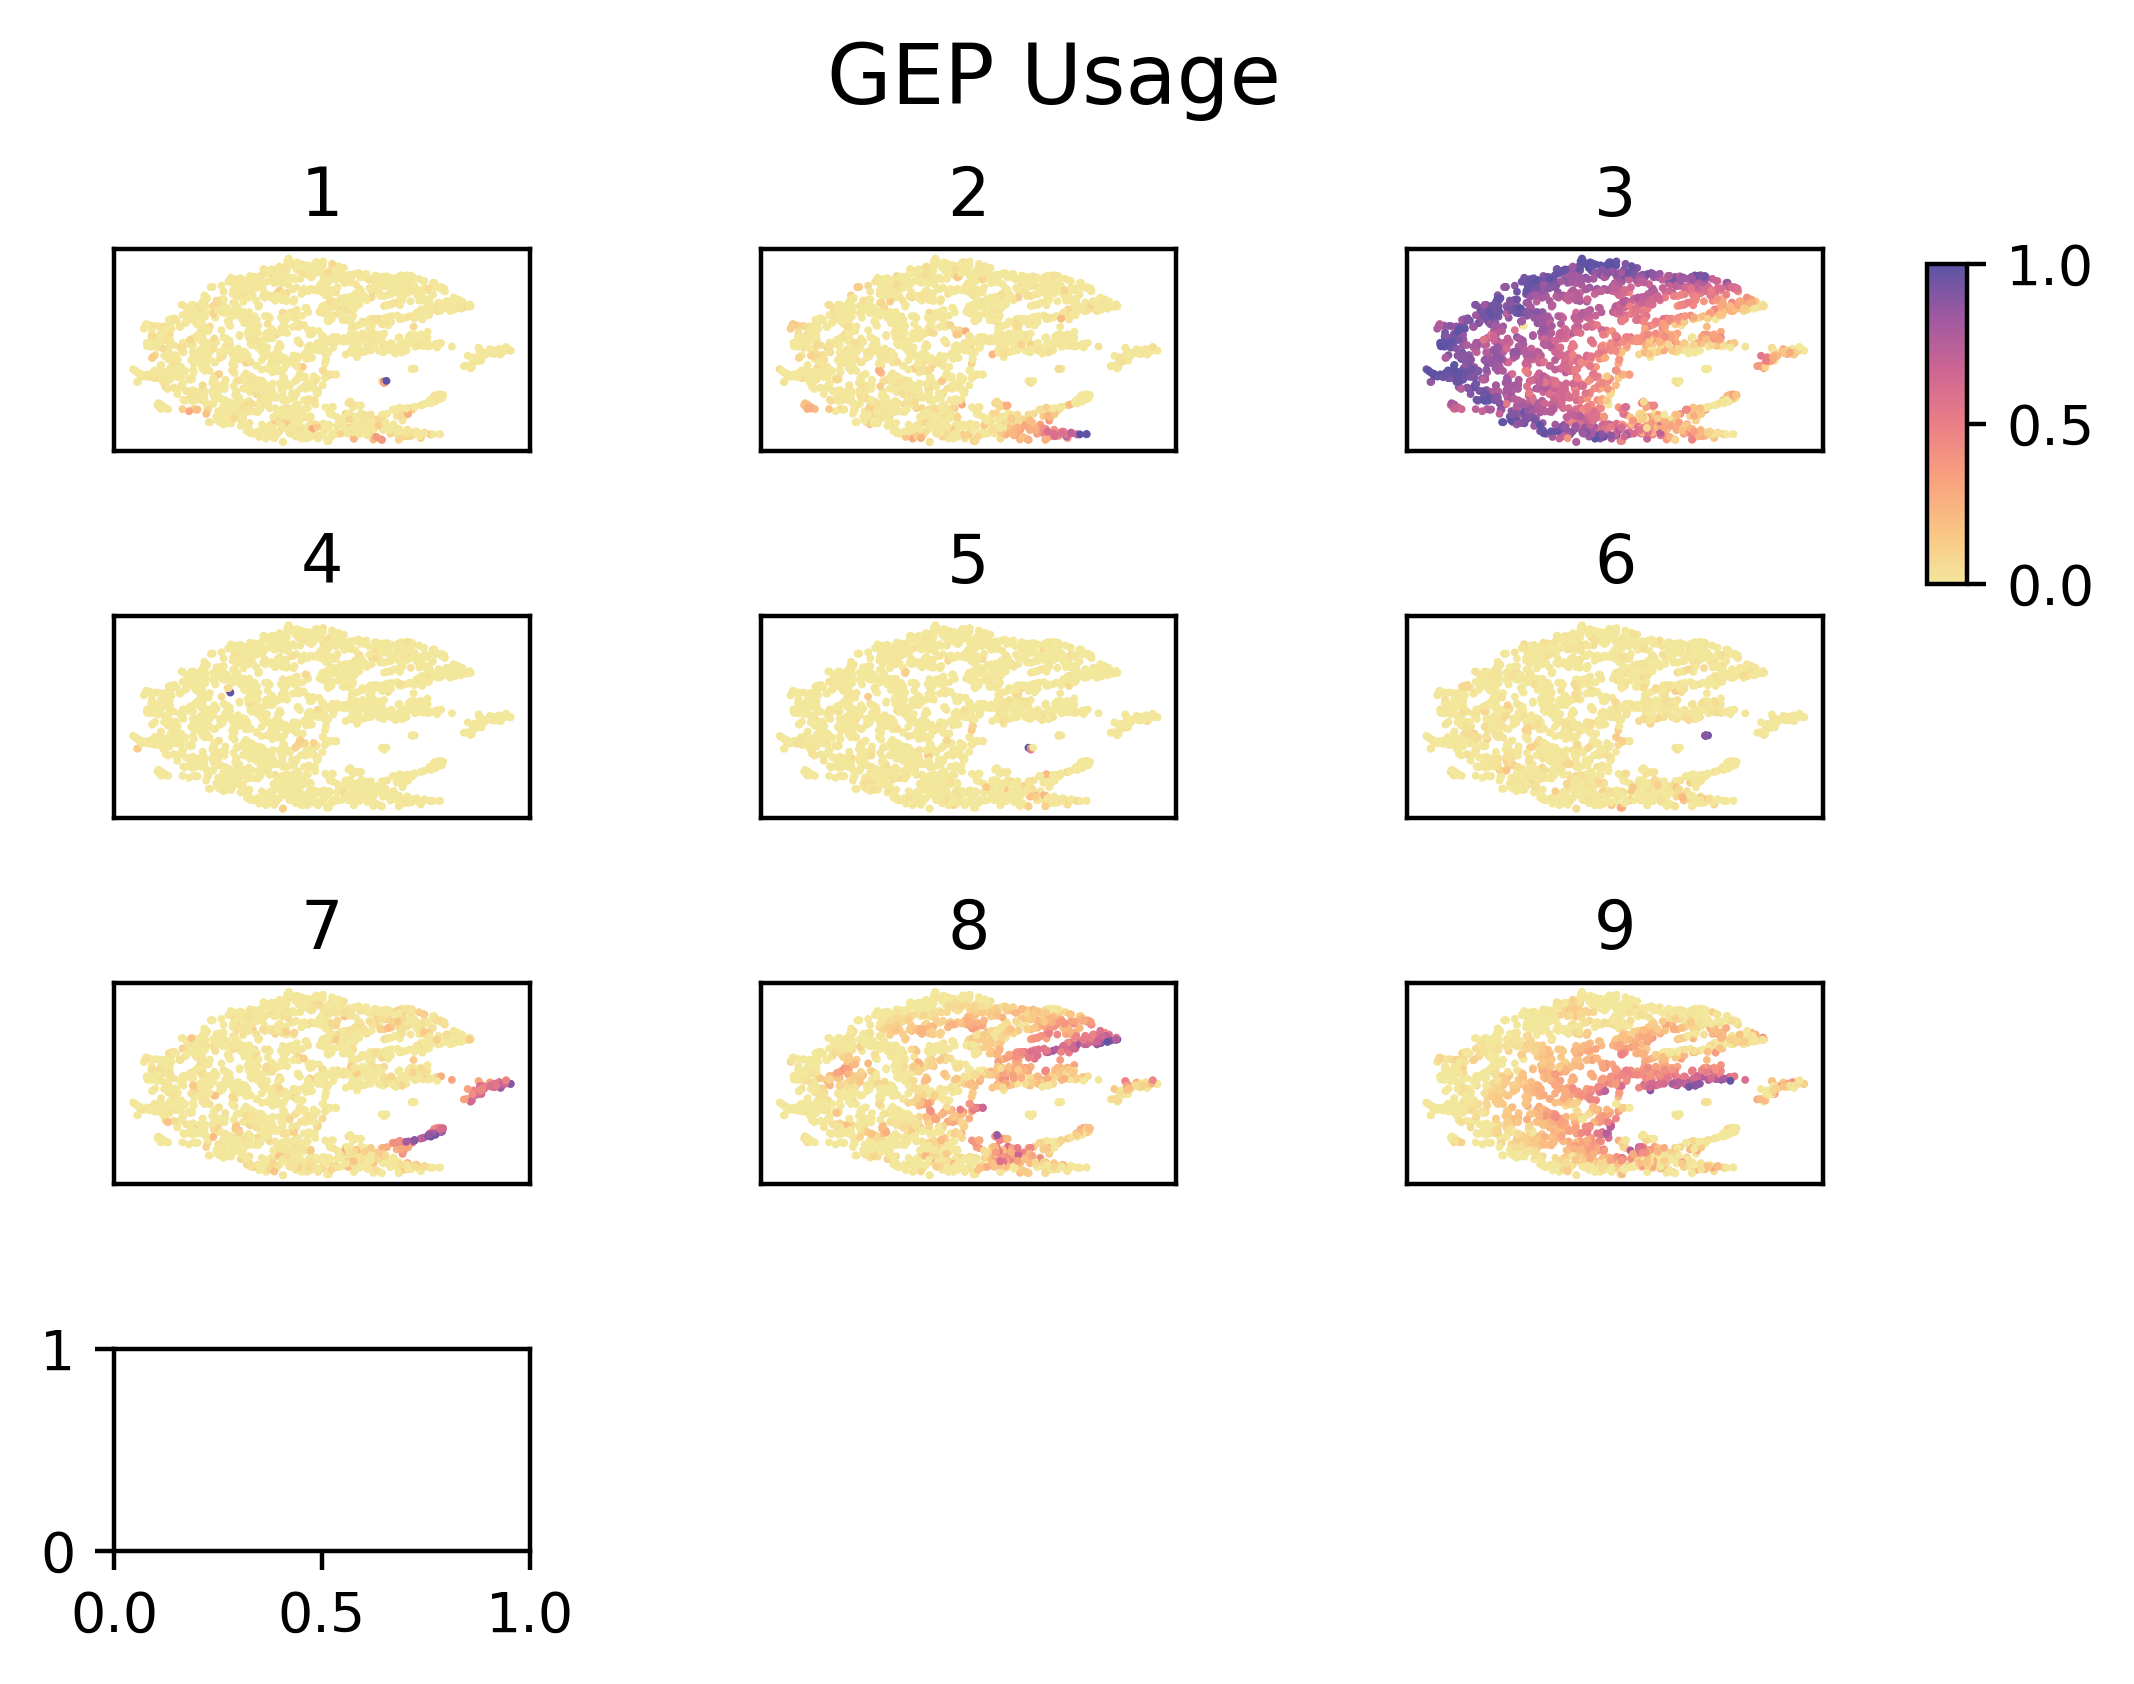

In [72]:
import palettable
cmap = palettable.cartocolors.sequential.Sunset_7.get_mpl_colormap()

(fig,axes) = plt.subplots(4,3, figsize=(5,4), dpi=400)
axes = axes.ravel()
for i in range(1, selected_K+1):
    sc = axes[i-1].scatter(tsne_and_usages['TSNE1'], tsne_and_usages['TSNE2'], c=tsne_and_usages[i],
                      cmap=cmap, vmin=0, vmax=1.,
                      s=2, edgecolor='none', rasterized=True)
    axes[i-1].set_title(i)
    axes[i-1].set_xticks([])
    axes[i-1].set_yticks([])
    
    
    
plt.tight_layout()
cbarax = fig.add_axes([1,.7,.02, .2])
plt.colorbar(sc, cax=cbarax)
_ = plt.figtext(.45,1,'GEP Usage', fontsize=15)
axes[-1].remove()
axes[-2].remove()

The plot above shows which cells are expressing which programs. The first program is distributed over cells of multiple identity programs and therefore corresponds to the activity program. GEP 2-6 correspond to distinct identity programs

We might also want to investigate which genes are driving which programs. We can do so by loading the Z-score transformed spectra and sorting it as follows


In [374]:
gene_scores = pd.read_csv(fr'{output_directory[1:-1]}\{run_name[1:-1]}\{run_name[1:-1]}.gene_spectra_score.k_%d.dt_%s.txt' % (selected_K, density_threshold_str), sep='\t', index_col=0)
gene_scores = gene_scores.T
gene_scores.head()

,1,2,3,4,5,6
RP11-34P13.7,-0.000044,-0.000041,-0.000043,0.000077,0.000040,-0.000027
AL627309.1,-0.000106,-0.000153,-0.000139,0.000040,0.000665,-0.000044
AP006222.2,0.000017,0.000021,0.000093,-0.000250,0.000252,0.000069
RP4-669L17.10,-0.000071,0.000533,-0.000080,-0.000374,-0.000158,0.000130
RP5-857K21.4,-0.000056,0.000139,-0.000117,-0.000242,0.000251,0.000162


## Below we plot the top 10 genes associated with each gene expression program

In [375]:
topgenes = []
num_top_genes=10
for gep in gene_scores.columns:
    topgenes.append(pd.Series(gene_scores[gep].sort_values(ascending=False).index[:num_top_genes]))
    
topgenes = pd.concat(topgenes, axis=1)
topgenes.columns = ['GEP%d' % g for g in gene_scores.columns]

In [376]:
topgenes

,GEP1,GEP2,GEP3,GEP4,GEP5,GEP6
0,IGFBP7,S100B,COL3A1,NKG7,TYROBP,CTD-2184D3.5
1,COL4A1,S100A6,COL1A2,RPS27,C1QB,UBE2S
2,PLVAP,MLANA,COL1A1,CD3E,C1QA,HMGN2
3,HSPG2,VIM,COL5A1,CCL5,C1QC,RP4-665J23.2
4,COL4A2,TYR,LUM,CST7,APOE,MS4A2
5,PLXNA2,CAV1,SFRP2,PTPRCAP,HLA-DRA,RP11-698N11.2
6,RAMP2,DCT,MMP13,CD3D,CD68,AC004017.1
7,ESAM,GPM6B,VSTM4,RPS26,FCER1G,LRRC10B
8,ENG,MARCKSL1,FGF7,CD7,CD74,RP11-482M8.1
9,RBP7,SYNGR1,MMP11,CD8A,NPC2,RP11-646I6.6
